# revisit Michael's code for croco and with pands and xarray tools

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

from crocopy import *

In [3]:
path_root = '/home2/pharos/othr/aponte/croco/'  # pharos is not accessible from datarmor
#path_root = '/home1/datawork/aponte/'

---

## single run

In [3]:
run = 'jet_cfg1_wp5_4km_0a2000j/'
r = CROCOrun(path_root+run, open_nc=['ave'])

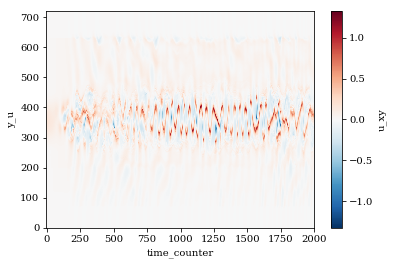

In [4]:
r.ave.u_xy.isel(x_u=125).plot(x='time_counter',y='y_u')

In [5]:
r.stats.head()

,STEP,KINETIC_ENRG,POTEN_ENRG,TOTAL_ENRG,NET_VOLUME,trd,ENSTROPHY,BTKIN_ENRG
time[DAYS],,,,,,,,
0.00000,0.0,0.000190,515.50741,515.5076,1.179648e+16,0.0,6.080387e-22,0.000069
0.03472,10.0,0.000190,515.50741,515.5076,1.179648e+16,0.0,6.068813e-22,0.000069
0.06944,20.0,0.000190,515.50741,515.5076,1.179648e+16,0.0,6.034739e-22,0.000070
0.10417,30.0,0.000189,515.50741,515.5076,1.179648e+16,0.0,5.985474e-22,0.000070
0.13889,40.0,0.000187,515.50742,515.5076,1.179648e+16,0.0,5.925845e-22,0.000070


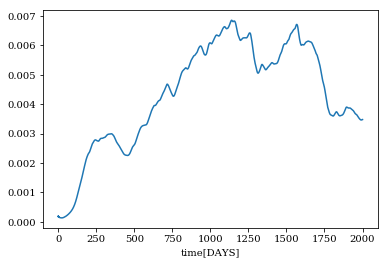

In [6]:
r.stats['KINETIC_ENRG'].plot()

In [7]:
r.params

{'dt': 300.0,
 'theta_s': 5.0,
 'theta_b': 0.0,
 'Hc': 100.0,
 'rho0': 1000.0,
 'y_itide': 400000.0,
 'jet_ywidth': 800000.0,
 'jet_weight': 0.5,
 'omega': 0.000145444104333}

---

## process multiple runs

In [8]:
runs = ['jet_cfg1_wp75_4km_0a2000j/','jet_cfg1_wp5_4km_0a2000j/']
runs.append('jet_cfg1_wp75_4km_decay_2000a3000j/')
runs.append('jet_cfg1_wp75_4km_nodecay_2000a3000j/')
R = [CROCOrun(path_root+run, open_nc=['ave']) for run in runs]

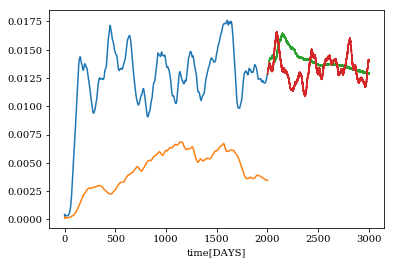

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
for r in R:
    r.stats['KINETIC_ENRG'].plot(ax=ax)